<a href="https://colab.research.google.com/github/dsgustavomoreira/Analise-de-Sentimento-com-Deep-Learning/blob/main/Classifica%C3%A7%C3%A3o_de_Texto_e_An%C3%A1lise_de_Sentimento_com_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importação das bibliotecas

Base de dados: www.kaggle.com/sid321axn/amazon-alexa-reviews

# Etapa 1: Importação das bibliotecas

In [426]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [427]:
dfalexa = pd.read_csv('/content/amazon-alexa.tsv', sep = '\t')

In [428]:
dfalexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [429]:
dfalexa.shape

(3150, 5)

In [430]:
nulos = dfalexa[dfalexa.isnull().any(axis=1)]
print(nulos)

     rating       date variation verified_reviews  feedback
473       2  29-Jun-18     White              NaN         0


In [431]:
# dfalexa.drop([473], inplace = True)
dfalexa.drop(473, inplace=True)

In [432]:
nulos = dfalexa[dfalexa.isnull().any(axis=1)]
print(nulos)

Empty DataFrame
Columns: [rating, date, variation, verified_reviews, feedback]
Index: []


In [433]:
dfalexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [434]:
dfalexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [435]:
dfalexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3149, dtype: object

# Etapa 3: Visualização dos dados

In [384]:
dfalexa['feedback'].unique()

array([1, 0])

In [385]:
dfalexa['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [436]:
positive = dfalexa[dfalexa['feedback'] == 1]

In [387]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [388]:
negative = dfalexa[dfalexa['feedback'] == 0]

In [437]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


<ipython-input-390-de3877a4e5a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfalexa, x='feedback', palette='Set1');


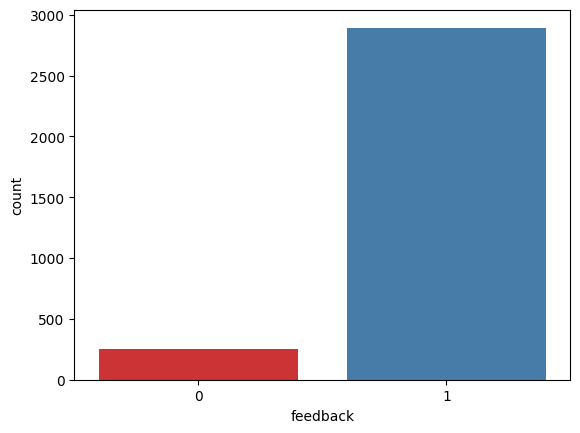

In [390]:
sns.countplot(data=dfalexa, x='feedback', palette='Set1');

<ipython-input-391-8f3f8045276e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfalexa, x = 'rating', palette='Set1')


<Axes: xlabel='rating', ylabel='count'>

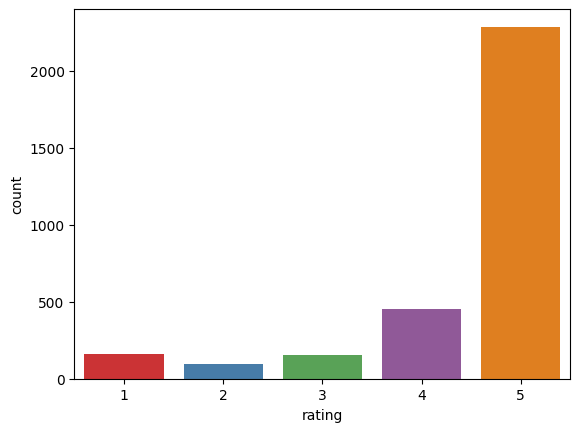

In [391]:
sns.countplot(data=dfalexa, x = 'rating', palette='Set1')

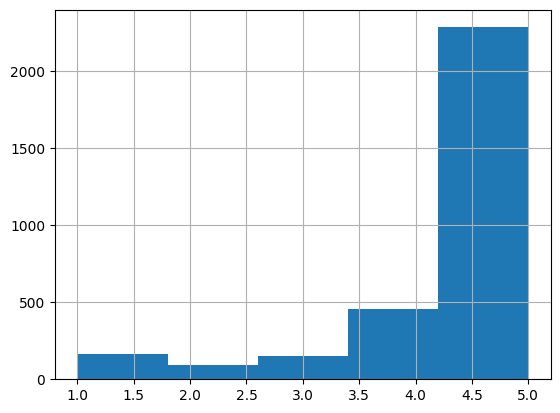

In [392]:
dfalexa['rating'].hist(bins=5);

<ipython-input-393-159bccba171f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = dfalexa, x = 'variation', y = 'rating', palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

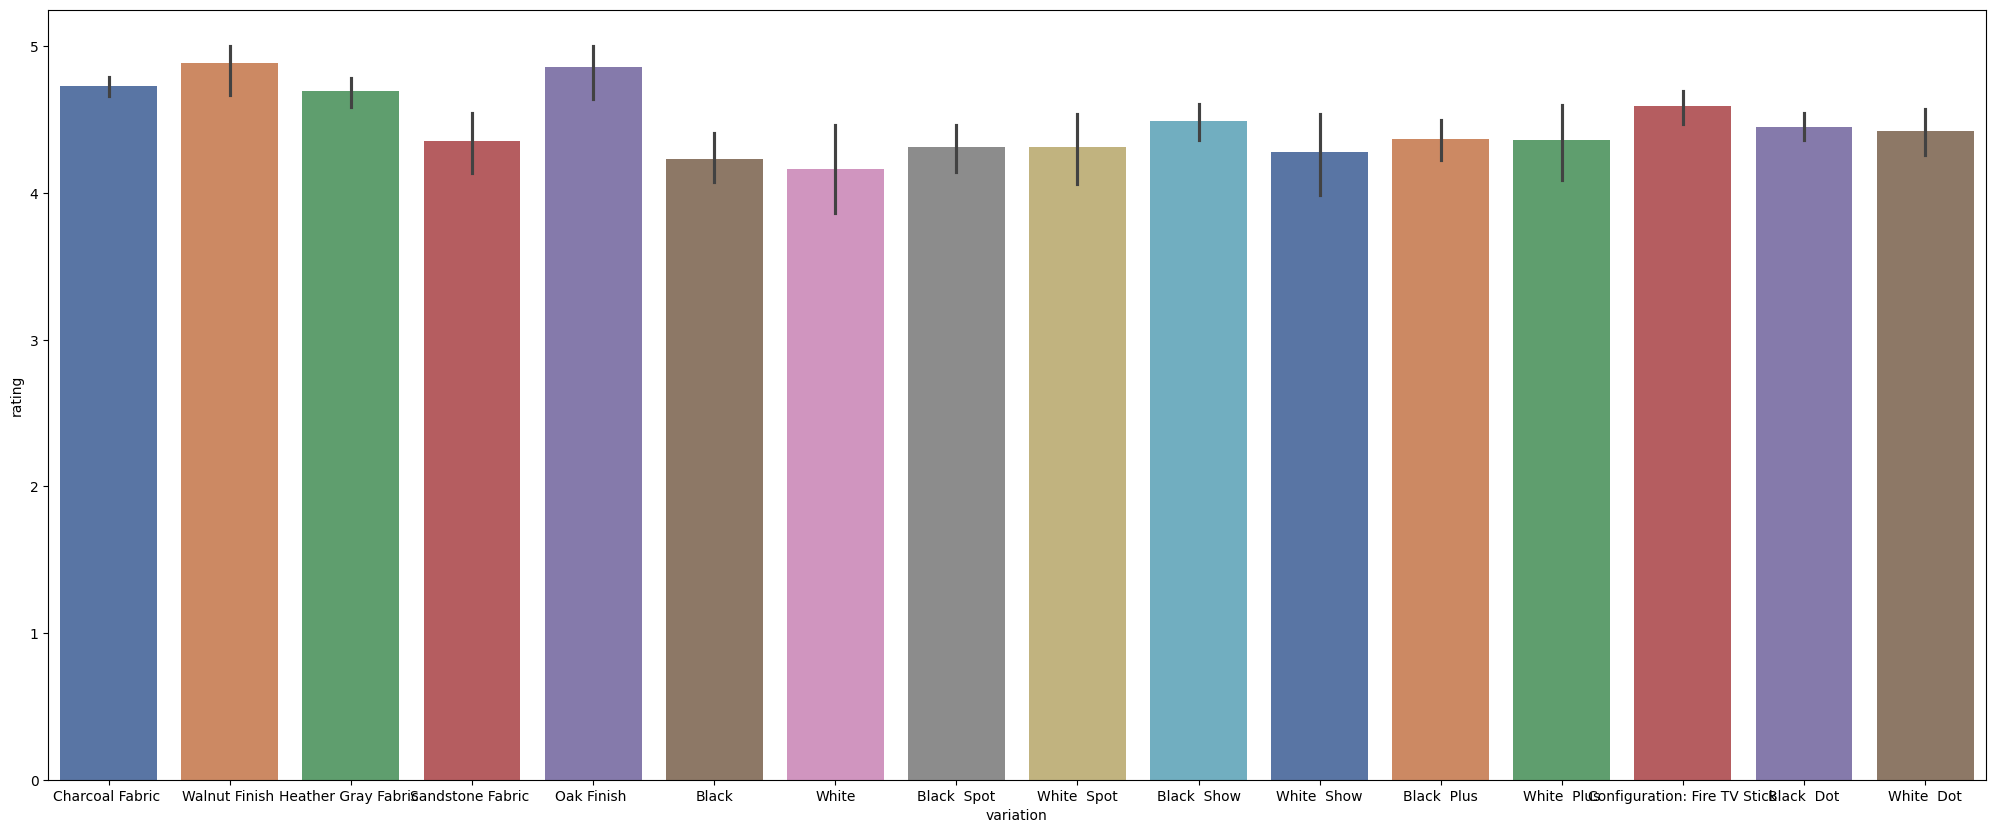

In [393]:
plt.figure(figsize=(25,10))
sns.barplot(data = dfalexa, x = 'variation', y = 'rating', palette = 'deep')

# Etapa 4: Limpeza dos dados

In [438]:
dfalexa= dfalexa.drop(['rating', 'date'], axis = 1)

In [439]:
dfalexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [440]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

dfvariation = pd.DataFrame(dfalexa['variation'])

variation_encoded = encoder.fit_transform(dfvariation).toarray()

variation_encoded = pd.DataFrame(variation_encoded)

# variation_dummies = pd.get_dummies(dfalexa['variation'])
#df_dummies_false = pd.get_dummies(dfalexa)
#df_dummies_true = pd.get_dummies(dfalexa, drop_first=True)

In [441]:
variation_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [442]:
dfalexa.drop(['variation'], axis = 1, inplace=True)

In [443]:
dfalexa.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [444]:
dfalexa = pd.concat([dfalexa, variation_encoded], axis = 1)

In [445]:
dfalexa.shape

(3150, 18)

In [446]:
nulos = dfalexa[dfalexa.isnull().any(axis=1)]
print(nulos)

     verified_reviews  feedback    0    1    2    3    4    5    6    7    8  \
3149             Good       1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
473               NaN       NaN  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        9   10   11   12   13   14   15  
3149  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
473   0.0  0.0  0.0  0.0  0.0  0.0  0.0  


In [447]:
dfalexa.drop([473, 3149], inplace=True)

In [448]:
nulos = dfalexa[dfalexa.isnull().any(axis=1)]
print(nulos)

Empty DataFrame
Columns: [verified_reviews, feedback, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Index: []


Exemplo de Tokenização

In [402]:
from sklearn.feature_extraction.text import CountVectorizer

In [403]:
sample_data = ['This is the first document.',
               'This document is the second document.',
               'And this is the third one.',
               'Is this the first document?']

In [404]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [405]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [406]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# Tokenização da base de dados

In [449]:
nulos = dfalexa[dfalexa.isnull().any(axis=1)]
print(nulos)

Empty DataFrame
Columns: [verified_reviews, feedback, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Index: []


In [450]:
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(dfalexa['verified_reviews'])

In [451]:
alexa_countvectorizer.shape

(3148, 4044)

In [452]:
type(alexa_countvectorizer)

scipy.sparse._csr.csr_matrix

In [453]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [454]:
print(vectorizer.vocabulary_)

{'love': 2150, 'my': 2320, 'echo': 1160, 'loved': 2151, 'it': 1933, 'sometimes': 3289, 'while': 3945, 'playing': 2640, 'game': 1504, 'you': 4028, 'can': 588, 'answer': 256, 'question': 2794, 'correctly': 853, 'but': 559, 'alexa': 196, 'says': 3059, 'got': 1567, 'wrong': 4008, 'and': 250, 'answers': 259, 'the': 3578, 'same': 3044, 'as': 314, 'like': 2076, 'being': 435, 'able': 79, 'to': 3646, 'turn': 3721, 'lights': 2075, 'on': 2445, 'off': 2429, 'away': 367, 'from': 1476, 'home': 1722, 'have': 1652, 'had': 1616, 'lot': 2144, 'of': 2428, 'fun': 1485, 'with': 3971, 'this': 3601, 'thing': 3596, 'yr': 4035, 'old': 2440, 'learns': 2046, 'about': 81, 'dinosaurs': 1039, 'control': 827, 'play': 2637, 'games': 1505, 'categories': 619, 'has': 1644, 'nice': 2370, 'sound': 3308, 'when': 3939, 'music': 2316, 'well': 3929, 'received': 2854, 'gift': 1536, 'needed': 2347, 'another': 255, 'bluetooth': 483, 'or': 2474, 'something': 3287, 'easily': 1156, 'accessible': 91, 'found': 1464, 'smart': 3247, 's

In [455]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [456]:
# Apagar a coluna 'verified_reviews' pois já temos a matriz com os valores numéricos
dfalexa.drop(['verified_reviews'], axis = 1, inplace = True)

In [457]:
nulos = dfalexa[dfalexa.isnull().any(axis=1)]
print(nulos)

Empty DataFrame
Columns: [feedback, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Index: []


In [458]:
dfalexa.head()

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [459]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [460]:
nulos = dfalexa[dfalexa.isnull().any(axis=1)]
print(nulos)

Empty DataFrame
Columns: [feedback, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Index: []


In [461]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [462]:
dfalexa = pd.concat([dfalexa, reviews], axis = 1)

In [463]:
nulos = dfalexa[dfalexa.isnull().any(axis=1)]
print(nulos)

      feedback    0    1    2    3    4    5    6    7    8  ...  4034  4035  \
3148       1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   NaN   NaN   
473        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   0.0   0.0   

      4036  4037  4038  4039  4040  4041  4042  4043  
3148   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
473    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[2 rows x 4061 columns]


In [465]:
# dfalexa.drop([473], inplace = True)
dfalexa.drop([473, 3148], inplace=True)

In [466]:
dfalexa.head()

,feedback,0,1,2,3,4,5,6,7,8,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [467]:
nulos = dfalexa[dfalexa.isnull().any(axis=1)]
print(nulos)

Empty DataFrame
Columns: [feedback, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, ...]
Index: []

[0 rows x 4061 columns]


In [468]:
X = dfalexa.drop(['feedback'], axis = 1)

In [469]:
X

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [470]:
X.shape

(3147, 4060)

In [471]:
y = dfalexa['feedback']

In [472]:
y.shape

(3147,)

In [473]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 5)

In [474]:
X_train.shape

(2517, 4060)

In [475]:
X_test.shape

(630, 4060)

# ETAPA 5: Construção e treinamento do modelo

In [476]:
# 4060 > 400 > 400 > 1
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (4060,)))
classifier.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [477]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               1624400   
                                                                 
 dense_4 (Dense)             (None, 400)               160400    
                                                                 
 dense_5 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1785201 (6.81 MB)
Trainable params: 1785201 (6.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [478]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [479]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 10)

Epoch 1/10
79/79 [==============================] - 4s 35ms/step - loss: 0.3273 - accuracy: 0.9130
Epoch 2/10
79/79 [==============================] - 3s 36ms/step - loss: 0.1922 - accuracy: 0.9285
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 0.1130 - accuracy: 0.9591
Epoch 4/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0696 - accuracy: 0.9770
Epoch 5/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0484 - accuracy: 0.9817
Epoch 6/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0358 - accuracy: 0.9849
Epoch 7/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0362 - accuracy: 0.9833
Epoch 8/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0285 - accuracy: 0.9865
Epoch 9/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0291 - accuracy: 0.9865
Epoch 10/10
79/79 [==============================] - 2s 23ms/step - loss: 0.0263 - accuracy: 0.9853


# Etapa 6: Avaliação do modelo

In [491]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [481]:
y_pred_train = classifier.predict(X_train)
y_pred_train

79/79 [==============================] - 1s 10ms/step


array([[1.        ],
       [0.02106252],
       [0.9998751 ],
       ...,
       [0.9999986 ],
       [0.99930525],
       [0.9999936 ]], dtype=float32)

In [482]:
y_pred_train = (y_pred_train > 0.5)
y_pred_train

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [487]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 180,   22],
       [   3, 2312]])

In [503]:
cr = classification_report(y_train, y_pred_train)
print(cr)

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94       202
         1.0       0.99      1.00      0.99      2315

    accuracy                           0.99      2517
   macro avg       0.99      0.94      0.96      2517
weighted avg       0.99      0.99      0.99      2517



<Axes: >

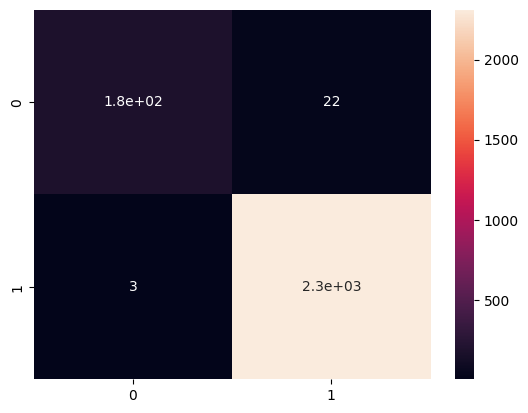

In [485]:
sns.heatmap(cm, annot=True)

In [495]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(y_test, y_pred_test)
cm

20/20 [==============================] - 0s 9ms/step


array([[ 11,  43],
       [  8, 568]])

In [504]:
cr = classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

         0.0       0.58      0.20      0.30        54
         1.0       0.93      0.99      0.96       576

    accuracy                           0.92       630
   macro avg       0.75      0.59      0.63       630
weighted avg       0.90      0.92      0.90       630



<Axes: >

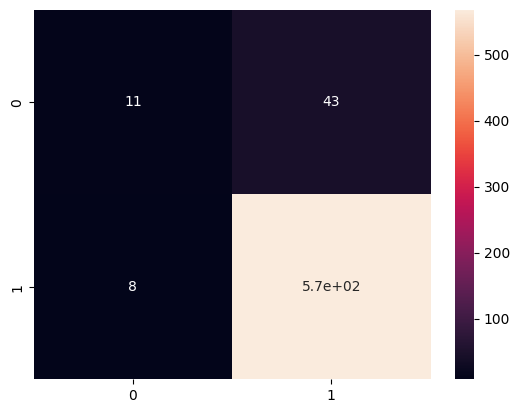

In [496]:
sns.heatmap(cm, annot=True)

In [498]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

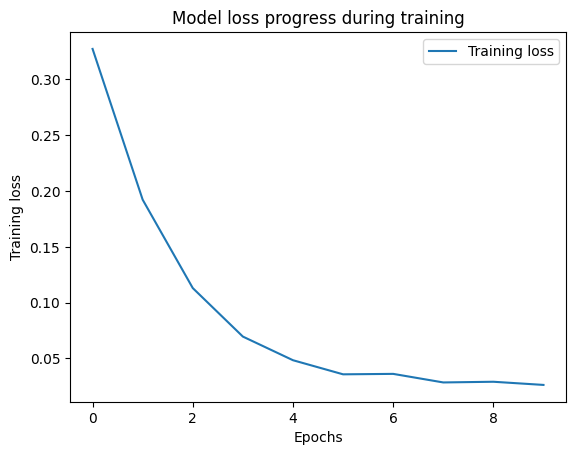

In [499]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

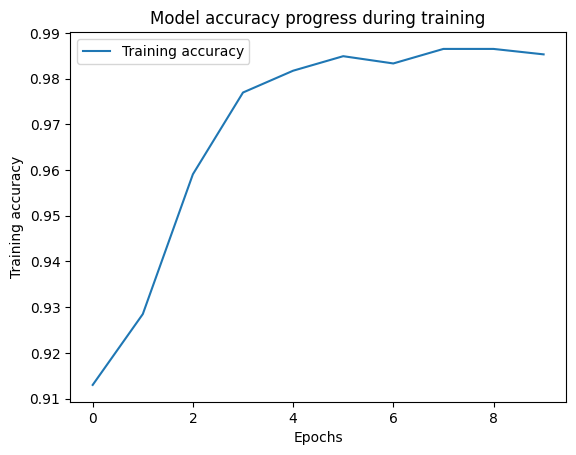

In [500]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])